<a href="https://colab.research.google.com/github/Abhishek1923/Edureka_DSML/blob/main/Consumer_Complaint_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
import pandas as pd

# Read the data from the CSV file and skip lines with errors
train_data = pd.read_csv(r'/content/Consumer_Complaints_train.csv', error_bad_lines=False)
test_data = pd.read_csv(r'/content/Consumer_Complaints_test.csv', error_bad_lines=False)


In [ ]:
print(train_data)
print(test_data)

       Date received                  Product  \
0         2015-10-14         Credit reporting   
1         2015-04-26  Bank account or service   
2         2013-12-20              Credit card   
3         2016-03-03          Debt collection   
4         2015-01-30          Debt collection   
...              ...                      ...   
145490    2013-10-16  Bank account or service   
145491    2014-07-21         Credit reporting   
145492    2014-10-20            Consumer Loan   
145493    2015-09-03              Credit card   
145494    2015-05-18              Credit card   

                                  Sub-product  \
0                                         NaN   
1                  Other bank product/service   
2                                         NaN   
3       Other (i.e. phone, health club, etc.)   
4                                     Medical   
...                                       ...   
145490                       Checking account   
145491             

In [ ]:
# Check datatypes
print(train_data.dtypes)
print(test_data.dtypes)

Date received                    object
Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer complaint narrative     object
Company public response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Date sent to company             object
Company response to consumer     object
Timely response?                 object
Consumer disputed?               object
Complaint ID                    float64
dtype: object
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         

In [ ]:
# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

# Drop columns with more than 25% missing data
train_data = train_data.dropna(thresh=len(train_data) * 0.75, axis=1)
test_data = test_data.dropna(thresh=len(test_data) * 0.75, axis=1)

Date received                        0
Product                              0
Sub-product                      58335
Issue                                0
Sub-issue                       122951
Consumer complaint narrative    169711
Company public response         162764
Company                              0
State                             1621
ZIP code                          1625
Tags                            173099
Consumer consent provided?      144111
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     1
Consumer disputed?                   1
Complaint ID                         1
dtype: int64
Date received                        0
Product                              0
Sub-product                      34683
Issue                                0
Sub-issue                        73250
Consumer complaint narrative    100692
Company public response          97146
Company     

In [ ]:
train_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653.0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613.0
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394.0
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134.0
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613.0


In [ ]:
test_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667


In [ ]:
# Extracting Day, Month, and Year

train_data['Date received'] = pd.to_datetime(train_data['Date received'])
test_data['Date received'] = pd.to_datetime(test_data['Date received'])

train_data['Month_Received'] = train_data['Date received'].dt.month
train_data['Year_Received'] = train_data['Date received'].dt.year
train_data['Day_Received'] = train_data['Date received'].dt.day

test_data['Month_Received'] = test_data['Date received'].dt.month
test_data['Year_Received'] = test_data['Date received'].dt.year
test_data['Day_Received'] = test_data['Date received'].dt.day


In [ ]:
print(train_data[['Month_Received','Year_Received','Day_Received']].head())
print(train_data[['Month_Received','Year_Received','Day_Received']].head())

   Month_Received  Year_Received  Day_Received
0              10           2015            14
1               4           2015            26
2              12           2013            20
3               3           2016             3
4               1           2015            30
   Month_Received  Year_Received  Day_Received
0              10           2015            14
1               4           2015            26
2              12           2013            20
3               3           2016             3
4               1           2015            30


In [ ]:
# Convert 'Date received' and 'Date sent to company' columns to datetime format
train_data['Date received'] = pd.to_datetime(train_data['Date received'], errors='coerce')
train_data['Date sent to company'] = pd.to_datetime(train_data['Date sent to company'], errors='coerce')

# Drop rows with missing dates in 'Date received' or 'Date sent to company' (optional)
train_data.dropna(subset=['Date received', 'Date sent to company'], inplace=True)

# Calculate Number of Days Held
train_data['Days_Held'] = (train_data['Date sent to company'] - train_data['Date received']).dt.days

# Drop the original 'Date received' and 'Date sent to company' columns (if needed)
train_data.drop(columns=['Date received', 'Date sent to company'], inplace=True)

# Convert 'Date received' and 'Date sent to company' columns in test_data to datetime format
test_data['Date received'] = pd.to_datetime(test_data['Date received'], errors='coerce')
test_data['Date sent to company'] = pd.to_datetime(test_data['Date sent to company'], errors='coerce')

# Drop rows with missing dates in 'Date received' or 'Date sent to company' (optional)
test_data.dropna(subset=['Date received', 'Date sent to company'], inplace=True)

# Calculate Number of Days Held for test_data
test_data['Days_Held'] = (test_data['Date sent to company'] - test_data['Date received']).dt.days

# Drop the original 'Date received' and 'Date sent to company' columns in test_data (if needed)
test_data.drop(columns=['Date received', 'Date sent to company'], inplace=True)


In [ ]:
train_data['Days_Held']
test_data['Days_Held']

0         0
1         0
2         0
3         3
4         0
         ..
119601    0
119602    1
119603    0
119604    0
119605    0
Name: Days_Held, Length: 119606, dtype: int64

In [ ]:
# Drop Unnecessary Columns
train_data.drop([ 'Complaint ID','ZIP code'], axis=1, inplace=True)
test_data.drop(['Complaint ID','ZIP code'], axis=1, inplace=True)

In [ ]:
train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_Received,Year_Received,Day_Received,Days_Held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,10,2015,14,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,4,2015,26,0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,12,2013,20,14
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,2016,3,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,1,2015,30,0


In [ ]:
test_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Month_Received,Year_Received,Day_Received,Days_Held
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,1,2015,17,0
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,6,2016,22,0
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,9,2015,4,0
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,5,2016,17,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,2016,7,0


In [ ]:
# Impute Null Values in 'State'
train_data['State'].fillna(train_data['State'].mode()[0], inplace=True)
test_data['State'].fillna(test_data['State'].mode()[0], inplace=True)

In [ ]:
# Store data of disputed people into the "disputed_cons" variable for future tasks
disputed_cons_train = train_data[train_data['Consumer disputed?'] == 'Yes']
disputed_cons_train.reset_index(drop=True, inplace=True)


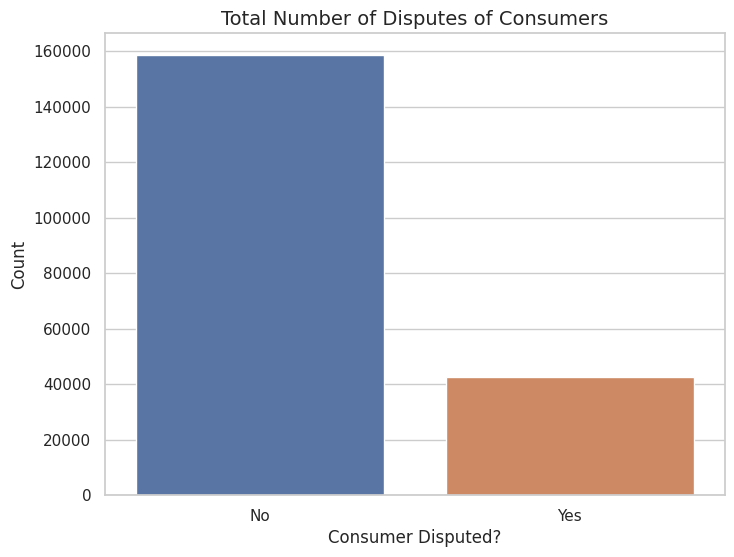

In [ ]:
# Plot bar graph of the total no of disputes consumer-wise with the help of seaborn

# If the column contains 'Yes' for disputed consumers
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Consumer disputed?', data=train_data)
ax.set_xlabel('Consumer Disputed?', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Total Number of Disputes of Consumers', fontsize=14)

# Display the plot
plt.show()


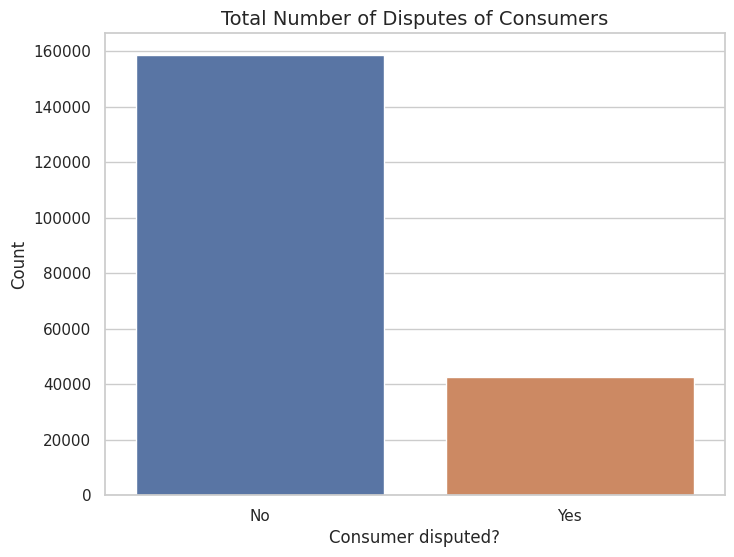

In [ ]:
# If the column contains 1 for disputed consumers (if 'Consumer Disputed?' is encoded as 0 for 'No' and 1 for 'Yes')
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Consumer disputed?', data=train_data)
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Consumer disputed?', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Total Number of Disputes of Consumers', fontsize=14)

# Display the plot
plt.show()


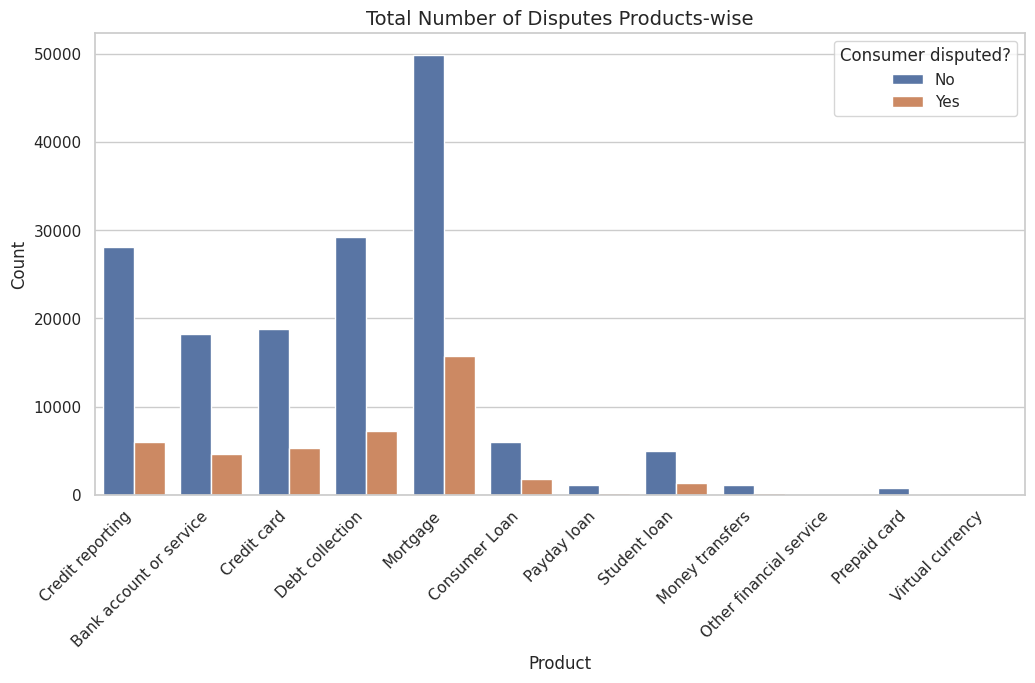

In [ ]:
# Plot bar graph of the total no of disputes products-wise with the help of seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Product' is the column name that represents the products
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Product', hue='Consumer disputed?', data=train_data)
ax.set_xlabel('Product', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Total Number of Disputes Products-wise', fontsize=14)
ax.legend(title='Consumer disputed?', loc='upper right')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


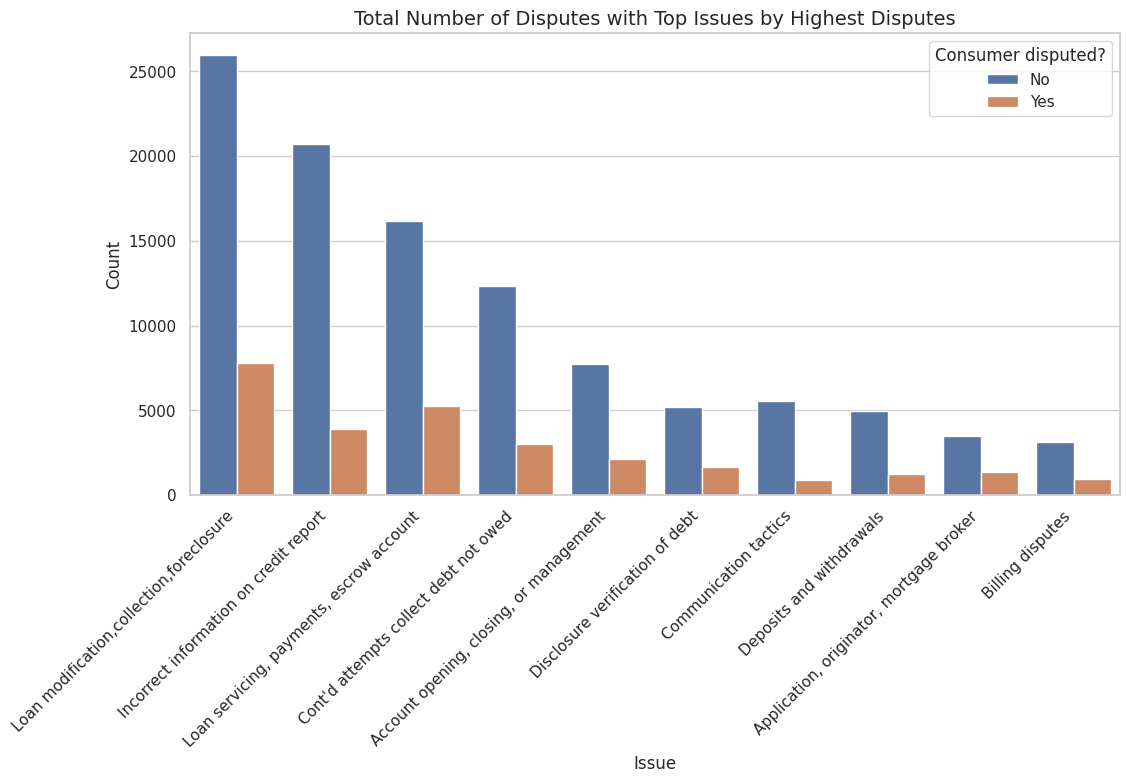

In [ ]:
# Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help of seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Issue' is the column name representing the issues
# Assuming 'Consumer Disputed?' is the column name that indicates if the consumer is disputed or not
# If the column contains 'Yes' for disputed consumers
top_issues = train_data['Issue'].value_counts().nlargest(10).index
data_filtered = train_data[train_data['Issue'].isin(top_issues)]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Issue', hue='Consumer disputed?', data=data_filtered, order=top_issues)
ax.set_xlabel('Issue', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Total Number of Disputes with Top Issues by Highest Disputes', fontsize=14)
ax.legend(title='Consumer disputed?', loc='upper right')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


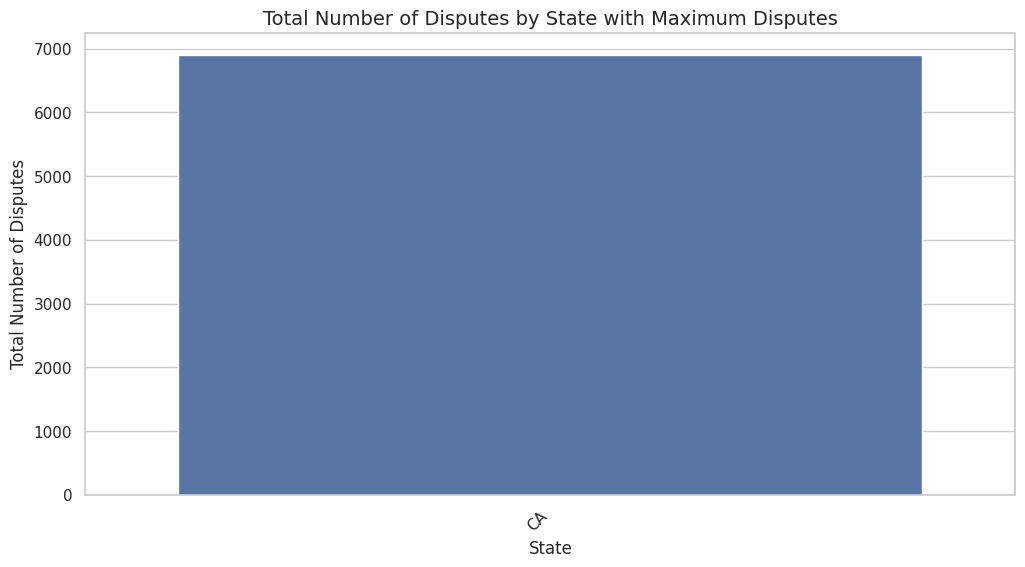

In [ ]:
# Plot bar graph of the total no of disputes by State with Maximum Disputes
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'State' is the column name representing the states
# Assuming 'Consumer Disputed?' is the column name that indicates if the consumer is disputed or not
# If the column contains 'Yes' for disputed consumers
state_disputes = train_data.groupby('State')['Consumer disputed?'].apply(lambda x: (x == 'Yes').sum()).reset_index()
max_disputes_state = state_disputes[state_disputes['Consumer disputed?'] == state_disputes['Consumer disputed?'].max()]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='State', y='Consumer disputed?', data=max_disputes_state)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Total Number of Disputes', fontsize=12)
ax.set_title('Total Number of Disputes by State with Maximum Disputes', fontsize=14)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


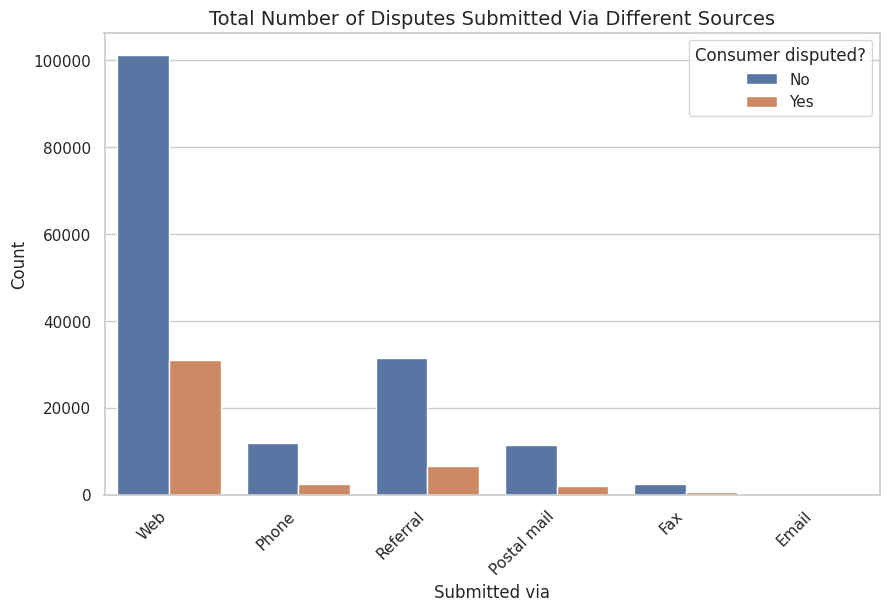

In [ ]:
# Plot bar graph of the total no of disputes Submitted Via different source

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Submitted via' is the column name representing the submission sources
# Assuming 'Consumer Disputed?' is the column name that indicates if the consumer is disputed or not
# If the column contains 'Yes' for disputed consumers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Submitted via', hue='Consumer disputed?', data=train_data)
ax.set_xlabel('Submitted via', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Total Number of Disputes Submitted Via Different Sources', fontsize=14)
ax.legend(title='Consumer disputed?', loc='upper right')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


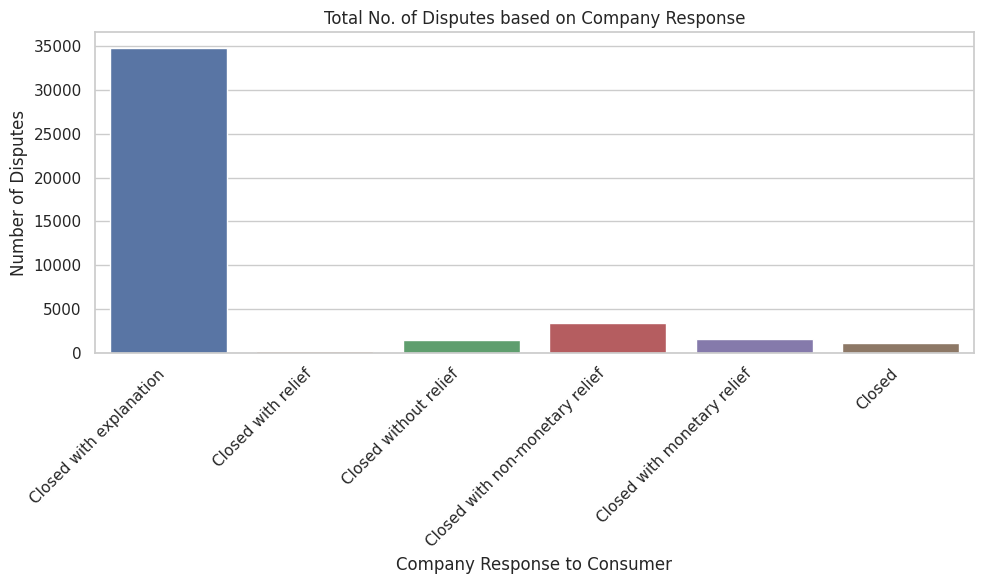

In [ ]:
# Filter the rows where 'Consumer Disputed?' column has the value 'Yes'
disputed_data = train_data[train_data['Consumer disputed?'] == 'Yes']

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.countplot(x='Company response to consumer', data=disputed_data)
plt.title('Total No. of Disputes based on Company Response')
plt.xlabel('Company Response to Consumer')
plt.ylabel('Number of Disputes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [ ]:
train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_Received,Year_Received,Day_Received,Days_Held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,10,2015,14,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,4,2015,26,0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,12,2013,20,14
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,2016,3,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,1,2015,30,0


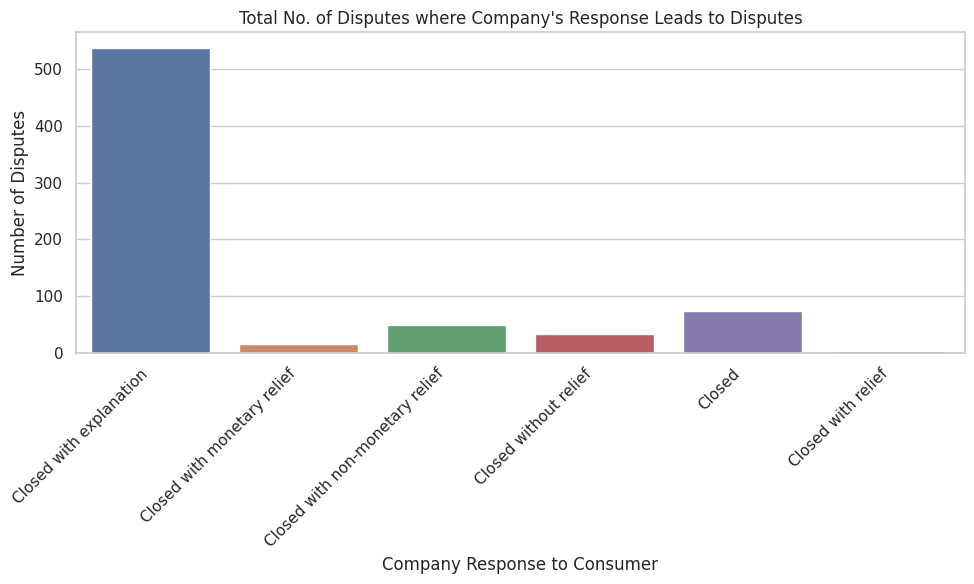

In [ ]:
# Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes
response_leads_to_disputes = train_data [(train_data ['Timely response?'] == 'No') & (train_data ['Consumer disputed?'] == 'Yes')]

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.countplot(x='Company response to consumer', data=response_leads_to_disputes)
plt.title("Total No. of Disputes where Company's Response Leads to Disputes")
plt.xlabel('Company Response to Consumer')
plt.ylabel('Number of Disputes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

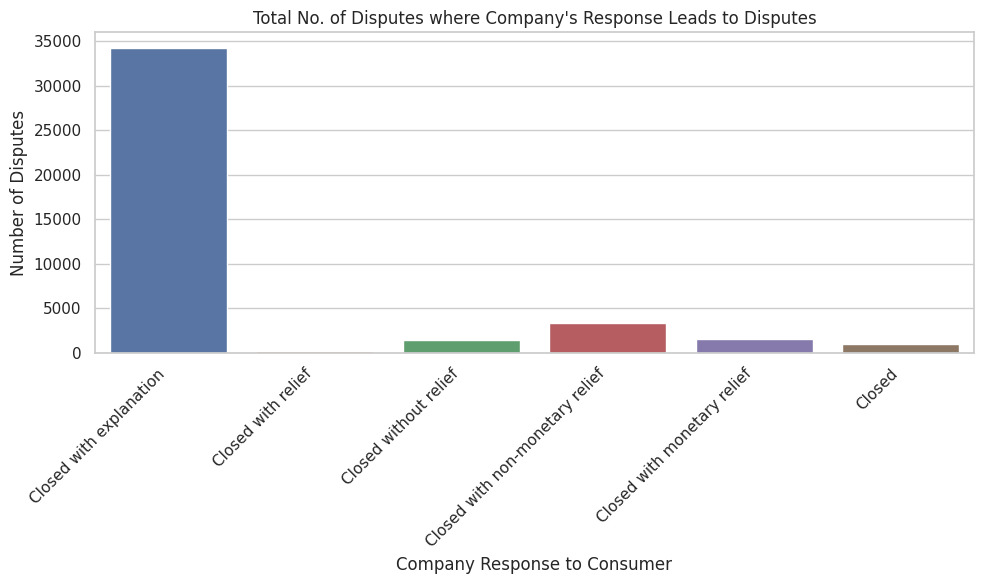

In [ ]:
# Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response

response_leads_to_disputes = train_data [(train_data ['Timely response?'] == 'Yes') & (train_data ['Consumer disputed?'] == 'Yes')]

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.countplot(x='Company response to consumer', data=response_leads_to_disputes)
plt.title("Total No. of Disputes where Company's Response Leads to Disputes")
plt.xlabel('Company Response to Consumer')
plt.ylabel('Number of Disputes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

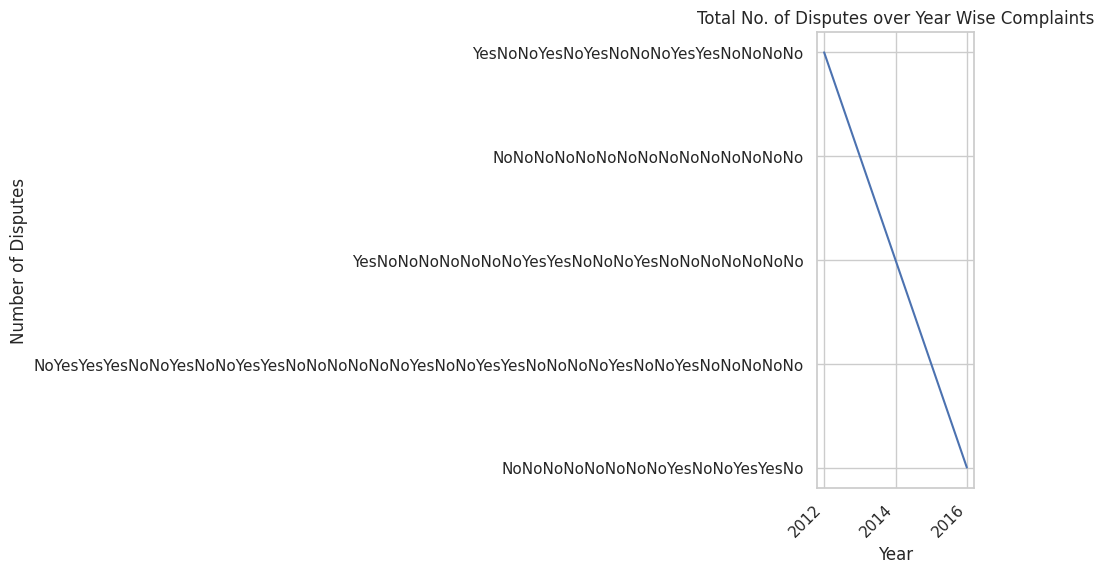

In [ ]:
# Plot bar graph of the total no of disputes over Year Wise Complaints
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data by 'Year_Received' and summing the number of disputes for each year
disputes_by_year = train_data.head(100).groupby('Year_Received')['Consumer disputed?'].sum()

# Plotting the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=disputes_by_year.index, y=disputes_by_year.values)
plt.title("Total No. of Disputes over Year Wise Complaints")
plt.xlabel('Year')
plt.ylabel('Number of Disputes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


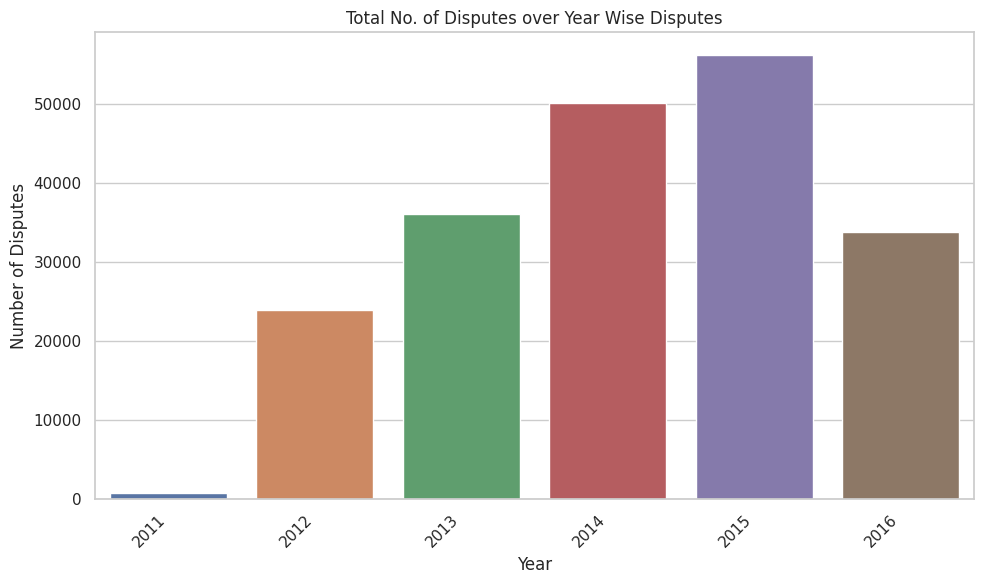

In [ ]:
# Plot bar graph of the total no of disputes over Year Wise Disputes
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data by 'Year_Received' and counting the number of disputes for each year
disputes_by_year = train_data.groupby('Year_Received')['Consumer disputed?'].count()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=disputes_by_year.index, y=disputes_by_year.values)
plt.title("Total No. of Disputes over Year Wise Disputes")
plt.xlabel('Year')
plt.ylabel('Number of Disputes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


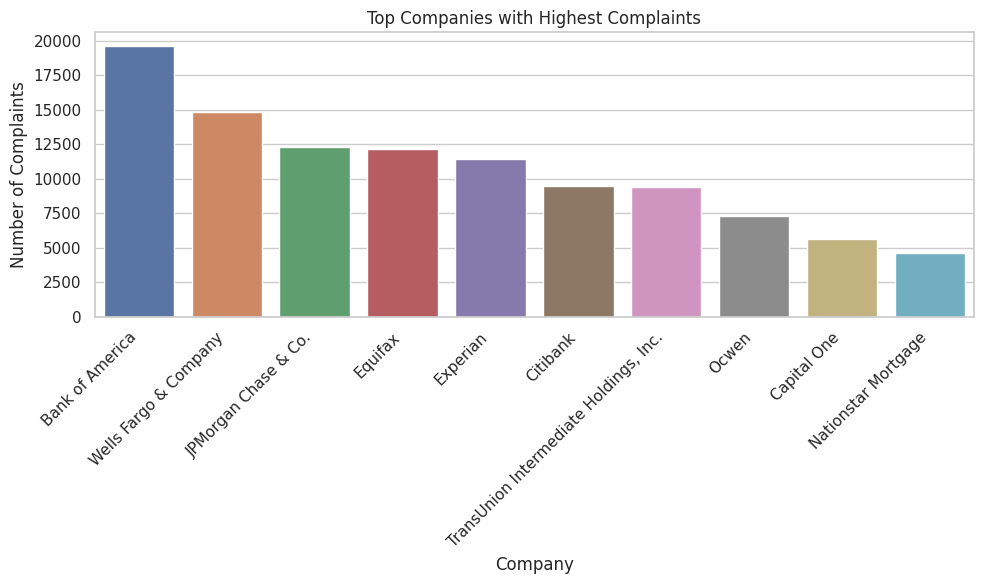

In [ ]:
# Plot bar graph of Top Companies with Highest Complaints

import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data by 'Company' and counting the number of complaints for each company
complaints_by_company = train_data['Company'].value_counts()

# Selecting the top 10 companies with the highest number of complaints
top_companies = complaints_by_company.nlargest(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.title("Top Companies with Highest Complaints")
plt.xlabel('Company')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [ ]:
# Converte all negative days held to zero (it is the time taken by the authority that can't be negative)
# Converting negative 'Days_Held' values to zero
train_data['Days_Held'] = train_data['Days_Held'].apply(lambda x: max(x, 0))
test_data['Days_Held'] = test_data['Days_Held'].apply(lambda x: max(x, 0))


In [ ]:
# Drop unnecessary columns
train_data.drop(['Company', 'State', 'Year_Received', 'Days_Held'], axis=1, inplace=True)
test_data.drop(['Company', 'State', 'Year_Received', 'Days_Held'], axis=1, inplace=True)


In [ ]:
# Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)
train_data['Consumer disputed?'] = train_data['Consumer disputed?'].map({'Yes': 1, 'No': 0})


In [ ]:
# Create Dummy Variables for categorical features and concat with the original data frame like:
#  'Product,’ 'Submitted via,’ 'Company response to consumer,’ 'Timely response?'

# Create dummy variables for categorical features in train_data
product_dummy = pd.get_dummies(train_data['Product'], prefix='Product', drop_first=True)
submitted_via_dummy = pd.get_dummies(train_data['Submitted via'], prefix='Submitted via', drop_first=True)
company_response_dummy = pd.get_dummies(train_data['Company response to consumer'], prefix='Company response', drop_first=True)
timely_response_dummy = pd.get_dummies(train_data['Timely response?'], prefix='Timely response', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
train_data = pd.concat([train_data, product_dummy, submitted_via_dummy, company_response_dummy, timely_response_dummy], axis=1)

# Drop the original categorical columns
train_data.drop(['Product', 'Submitted via', 'Company response to consumer', 'Timely response?'], axis=1, inplace=True)

# Repeat the same process for test_data
product_dummy = pd.get_dummies(test_data['Product'], prefix='Product', drop_first=True)
submitted_via_dummy = pd.get_dummies(test_data['Submitted via'], prefix='Submitted via', drop_first=True)
company_response_dummy = pd.get_dummies(test_data['Company response to consumer'], prefix='Company response', drop_first=True)
timely_response_dummy = pd.get_dummies(test_data['Timely response?'], prefix='Timely response', drop_first=True)

test_data = pd.concat([test_data, product_dummy, submitted_via_dummy, company_response_dummy, timely_response_dummy], axis=1)
test_data.drop(['Product', 'Submitted via', 'Company response to consumer', 'Timely response?'], axis=1, inplace=True)


In [ ]:
train_data.head()

,Issue,Consumer disputed?,Month_Received,Day_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,...,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response_Closed with,Company response_Closed with explanation,Company response_Closed with monetary relief,Company response_Closed with non-monetary relief,Company response_Closed with relief,Company response_Closed without relief,Timely response_Yes
0,Incorrect information on credit report,0.0,10,14,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,Deposits and withdrawals,1.0,4,26,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,Other,0.0,12,20,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,Disclosure verification of debt,0.0,3,3,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,Disclosure verification of debt,1.0,1,30,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
# Scaling the Data Sets (note: discard dependent variable before doing standardization)
# and Make feature Selection with the help of PCA up to 80% of the information.

# Separate the dependent and independent variables
X = train_data.drop('Consumer disputed?', axis=1)
y = train_data['Consumer disputed?']

# Convert categorical columns to one-hot encoding
X_encoded = pd.get_dummies(X)

# Scaling the independent variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_scaled

array([[ 1.14778694, -0.1982985 , -0.20161863, ..., -0.04562831,
        -0.08834185, -0.01878886],
       [-0.64115253,  1.18047885, -0.20161863, ..., -0.04562831,
        -0.08834185, -0.01878886],
       [ 1.7441001 ,  0.49109018, -0.20161863, ..., -0.04562831,
        -0.08834185, -0.01878886],
       ...,
       [ 0.55147378, -0.88768717, -0.20161863, ..., -0.04562831,
        -0.08834185, -0.01878886],
       [ 0.84963036, -1.1174834 , -0.20161863, ..., -0.04562831,
        -0.08834185, -0.01878886],
       [-0.64115253,  0.7208864 , -0.20161863, ..., -0.04562831,
        -0.08834185, -0.01878886]])

In [ ]:
# Perform PCA to retain 80% of information
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)

X_pca


array([[-1.93903056e+00, -8.17306123e-02,  2.54623460e+00, ...,
        -4.20535697e-04, -4.91605194e-03,  3.37331392e-03],
       [-1.14263374e-01, -1.22524756e-01, -2.93875696e-01, ...,
         5.38609646e-03,  3.36554407e-02, -1.16729674e-02],
       [-3.19270043e-01,  3.11424656e+00, -1.02553987e+00, ...,
        -1.20232618e-02,  5.37490829e-02,  2.25440180e-02],
       ...,
       [-3.01289292e-02,  3.33673885e+00, -1.86955534e+00, ...,
         1.97409122e-02, -4.53218758e-02, -3.57056207e-02],
       [-9.09811601e-01,  4.33626484e+00, -2.43062552e+00, ...,
         3.37890402e-02,  6.31869048e-02, -1.78288430e-02],
       [ 2.06255467e+00, -1.38196779e+00, -3.00349090e-01, ...,
        -8.25395856e+00,  8.41261054e+01,  4.61243808e+00]])

In [ ]:
print(X_pca.shape)
print(y.shape)


(201192, 83)
(201191,)


In [ ]:
print(X.shape[0])
print(y.shape[0])


201191
201191


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['Consumer disputed?'] = label_encoder.fit_transform(train_data['Consumer disputed?'])
train_data.head()

,Issue,Consumer disputed?,Month_Received,Day_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,...,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response_Closed with,Company response_Closed with explanation,Company response_Closed with monetary relief,Company response_Closed with non-monetary relief,Company response_Closed with relief,Company response_Closed without relief,Timely response_Yes
0,Incorrect information on credit report,0,10,14,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,Deposits and withdrawals,1,4,26,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,Other,0,12,20,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,Disclosure verification of debt,0,3,3,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,Disclosure verification of debt,1,1,30,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
# Create a list of all columns in the dataset
all_columns = train_data.columns

# Create a list of numeric columns
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

# Create a list of non-numeric columns
non_numeric_columns = [col for col in all_columns if col not in numeric_columns]

# Display the non-numeric columns
print(numeric_columns)


Index(['Consumer disputed?', 'Month_Received', 'Day_Received'], dtype='object')


In [ ]:
# Step 1: Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 2: Prepare the data
# Assuming 'train_data' is the DataFrame containing all the data
# Assuming the list of selected features is 'features_list'
X = train_data[numeric_columns]
y = train_data['Consumer disputed?']  # Assuming 'Consumer disputed?' is the target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Create and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Step 5: Predict the target variable for the test data
y_pred = logistic_model.predict(X_test)

# Step 6: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0
